## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras
import itertools

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your hyper-parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.7, 0.9, 0.95, 0.99]

In [7]:
results = {}
"""
Build the experiment loop
"""
for lr, momentum in itertools.product(LEARNING_RATE, MOMENTUM):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Momentum = %.2f" % (lr, momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s" % (str(lr), str(momentum))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000, Momentum = 0.70
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions 

50000/50000 [==============================] - 19s 372us/step - loss: 0.8366 - acc: 0.6981 - val_loss: 1.7909 - val_acc: 0.4765
Epoch 48/50
50000/50000 [==============================] - 19s 378us/step - loss: 0.8294 - acc: 0.7005 - val_loss: 1.7488 - val_acc: 0.4954
Epoch 49/50
50000/50000 [==============================] - 17s 346us/step - loss: 0.8171 - acc: 0.7048 - val_loss: 1.8126 - val_acc: 0.4897
Epoch 50/50
50000/50000 [==============================] - 17s 338us/step - loss: 0.8073 - acc: 0.7077 - val_loss: 2.1559 - val_acc: 0.4491
Experiment with LR = 0.100000, Momentum = 0.90
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_la

Epoch 48/50
50000/50000 [==============================] - 17s 339us/step - loss: 1.2461 - acc: 0.5553 - val_loss: 1.5760 - val_acc: 0.4689
Epoch 49/50
50000/50000 [==============================] - 17s 338us/step - loss: 1.2458 - acc: 0.5580 - val_loss: 1.6202 - val_acc: 0.4567
Epoch 50/50
50000/50000 [==============================] - 17s 345us/step - loss: 1.2337 - acc: 0.5570 - val_loss: 1.6251 - val_acc: 0.4425
Experiment with LR = 0.100000, Momentum = 0.95
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidde

50000/50000 [==============================] - 17s 345us/step - loss: 1.4516 - acc: 0.4874 - val_loss: 1.7124 - val_acc: 0.4174
Epoch 49/50
50000/50000 [==============================] - 17s 342us/step - loss: 1.4414 - acc: 0.4911 - val_loss: 1.6459 - val_acc: 0.4364
Epoch 50/50
50000/50000 [==============================] - 17s 346us/step - loss: 1.4412 - acc: 0.4937 - val_loss: 1.6580 - val_acc: 0.4253
Experiment with LR = 0.100000, Momentum = 0.99
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (De

50000/50000 [==============================] - 18s 352us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 17s 346us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 17s 349us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 17s 348us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.010000, Momentum = 0.70
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
h

Epoch 48/50
50000/50000 [==============================] - 17s 332us/step - loss: 0.8608 - acc: 0.6982 - val_loss: 2.0937 - val_acc: 0.3961
Epoch 49/50
50000/50000 [==============================] - 17s 331us/step - loss: 0.8543 - acc: 0.7027 - val_loss: 1.4995 - val_acc: 0.5053
Epoch 50/50
50000/50000 [==============================] - 16s 330us/step - loss: 0.8340 - acc: 0.7104 - val_loss: 1.4003 - val_acc: 0.5331
Experiment with LR = 0.010000, Momentum = 0.90
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidde

50000/50000 [==============================] - 17s 344us/step - loss: 0.4550 - acc: 0.8388 - val_loss: 1.9534 - val_acc: 0.5277
Epoch 49/50
50000/50000 [==============================] - 17s 339us/step - loss: 0.4425 - acc: 0.8432 - val_loss: 1.9030 - val_acc: 0.5356
Epoch 50/50
50000/50000 [==============================] - 17s 338us/step - loss: 0.4257 - acc: 0.8490 - val_loss: 1.9505 - val_acc: 0.5254
Experiment with LR = 0.010000, Momentum = 0.95
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (De

50000/50000 [==============================] - 15s 309us/step - loss: 0.4143 - acc: 0.8506 - val_loss: 2.2574 - val_acc: 0.5246
Epoch 49/50
50000/50000 [==============================] - 22s 434us/step - loss: 0.3936 - acc: 0.8582 - val_loss: 2.1442 - val_acc: 0.5309
Epoch 50/50
50000/50000 [==============================] - 23s 467us/step - loss: 0.3892 - acc: 0.8614 - val_loss: 2.1554 - val_acc: 0.5334
Experiment with LR = 0.010000, Momentum = 0.99
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (De

Epoch 49/50
50000/50000 [==============================] - 23s 458us/step - loss: 0.7904 - acc: 0.7192 - val_loss: 1.9433 - val_acc: 0.4871
Epoch 50/50
50000/50000 [==============================] - 17s 334us/step - loss: 0.7964 - acc: 0.7161 - val_loss: 2.0161 - val_acc: 0.4842
Experiment with LR = 0.001000, Momentum = 0.70
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense

Epoch 50/50
50000/50000 [==============================] - 16s 315us/step - loss: 1.4321 - acc: 0.5003 - val_loss: 1.4776 - val_acc: 0.4813
Experiment with LR = 0.001000, Momentum = 0.90
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
___________

Experiment with LR = 0.001000, Momentum = 0.95
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 288us/step - loss: 1.9901 - acc: 0.2866 - val_loss: 1.8027 - val_acc: 0.3640
Epoch 2/50
50000/50000 [==============================] - 14s 282us/step - loss: 1.7290 - acc: 0.3920 - val_loss: 1.6643 - val_acc: 0.4153
Epoch 3/50
50000/50000 [==============================] - 15s 294us/step - loss: 1.6056 - acc: 0.4342 - val_loss: 1.5678 - val_acc: 0.4481
Epoch 4/50
50000/50000 [==============================] - 21s 429us/step - loss: 1.5273 - acc: 0.4604 - val_loss: 1.5234 - val_acc: 0.4661
Epoch 5/50
50000/50000 [==============================] - 25s 503us/step - loss: 1.4642 - acc: 0.4830 - val_loss: 1.4842 - val_acc: 0.4742
Epoch 6/50
50000/50000 [==============================] - 24s 479us/step - loss: 1.4144 - acc: 0.4981 - val_loss: 1.4348 - val_acc: 0.4896
Epoch 7/50
50000/50000 [==============================] - 16s 317us/step - loss: 1.3752 - acc: 0.5129 - val_loss: 1.

50000/50000 [==============================] - 21s 424us/step - loss: 2.3234 - acc: 0.1315 - val_loss: 2.2835 - val_acc: 0.1347
Epoch 2/50
50000/50000 [==============================] - 24s 473us/step - loss: 2.2646 - acc: 0.1586 - val_loss: 2.2507 - val_acc: 0.1663
Epoch 3/50
50000/50000 [==============================] - 21s 421us/step - loss: 2.2352 - acc: 0.1843 - val_loss: 2.2237 - val_acc: 0.1898
Epoch 4/50
50000/50000 [==============================] - 14s 288us/step - loss: 2.2095 - acc: 0.2033 - val_loss: 2.1999 - val_acc: 0.2047
Epoch 5/50
50000/50000 [==============================] - 14s 282us/step - loss: 2.1872 - acc: 0.2151 - val_loss: 2.1790 - val_acc: 0.2130
Epoch 6/50
50000/50000 [==============================] - 14s 287us/step - loss: 2.1675 - acc: 0.2247 - val_loss: 2.1603 - val_acc: 0.2223
Epoch 7/50
50000/50000 [==============================] - 21s 426us/step - loss: 2.1496 - acc: 0.2334 - val_loss: 2.1432 - val_acc: 0.2306
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 14s 279us/step - loss: 2.1885 - acc: 0.2195 - val_loss: 2.1546 - val_acc: 0.2337
Epoch 3/50
50000/50000 [==============================] - 15s 295us/step - loss: 2.1288 - acc: 0.2503 - val_loss: 2.1019 - val_acc: 0.2581
Epoch 4/50
50000/50000 [==============================] - 24s 472us/step - loss: 2.0813 - acc: 0.2673 - val_loss: 2.0598 - val_acc: 0.2728
Epoch 5/50
50000/50000 [==============================] - 25s 497us/step - loss: 2.0429 - acc: 0.2824 - val_loss: 2.0263 - val_acc: 0.2865
Epoch 6/50
50000/50000 [==============================] - 23s 454us/step - loss: 2.0119 - acc: 0.2938 - val_loss: 1.9980 - val_acc: 0.2908
Epoch 7/50
50000/50000 [==============================] - 15s 308us/step - loss: 1.9859 - acc: 0.3039 - val_loss: 1.9749 - val_acc: 0.3042
Epoch 8/50
50000/50000 [==============================] - 14s 280us/step - loss: 1.9637 - acc: 0.3137 - val_loss: 1.9543 - val_acc: 0.3115
Epoch 9/50
50000/50000 [===

50000/50000 [==============================] - 16s 312us/step - loss: 2.1079 - acc: 0.2541 - val_loss: 2.0672 - val_acc: 0.2734
Epoch 3/50
50000/50000 [==============================] - 22s 439us/step - loss: 2.0333 - acc: 0.2874 - val_loss: 2.0053 - val_acc: 0.2952
Epoch 4/50
50000/50000 [==============================] - 23s 468us/step - loss: 1.9797 - acc: 0.3089 - val_loss: 1.9590 - val_acc: 0.3164
Epoch 5/50
50000/50000 [==============================] - 21s 415us/step - loss: 1.9396 - acc: 0.3237 - val_loss: 1.9242 - val_acc: 0.3336
Epoch 6/50
50000/50000 [==============================] - 14s 287us/step - loss: 1.9089 - acc: 0.3361 - val_loss: 1.8965 - val_acc: 0.3374
Epoch 7/50
50000/50000 [==============================] - 14s 280us/step - loss: 1.8833 - acc: 0.3444 - val_loss: 1.8735 - val_acc: 0.3461
Epoch 8/50
50000/50000 [==============================] - 16s 313us/step - loss: 1.8629 - acc: 0.3533 - val_loss: 1.8546 - val_acc: 0.3532
Epoch 9/50
50000/50000 [==============

Epoch 3/50
50000/50000 [==============================] - 23s 453us/step - loss: 1.8670 - acc: 0.3407 - val_loss: 1.8335 - val_acc: 0.3525
Epoch 4/50
50000/50000 [==============================] - 15s 293us/step - loss: 1.8043 - acc: 0.3671 - val_loss: 1.7815 - val_acc: 0.3727
Epoch 5/50
50000/50000 [==============================] - 14s 279us/step - loss: 1.7568 - acc: 0.3844 - val_loss: 1.7407 - val_acc: 0.3849
Epoch 6/50
50000/50000 [==============================] - 14s 285us/step - loss: 1.7197 - acc: 0.3984 - val_loss: 1.7063 - val_acc: 0.4007
Epoch 7/50
50000/50000 [==============================] - 19s 384us/step - loss: 1.6907 - acc: 0.4098 - val_loss: 1.6808 - val_acc: 0.4068
Epoch 8/50
50000/50000 [==============================] - 24s 479us/step - loss: 1.6657 - acc: 0.4171 - val_loss: 1.6631 - val_acc: 0.4138
Epoch 9/50
50000/50000 [==============================] - 23s 469us/step - loss: 1.6388 - acc: 0.4283 - val_loss: 1.6325 - val_acc: 0.4242
Epoch 10/50
50000/50000 [==

Epoch 4/50
50000/50000 [==============================] - 15s 305us/step - loss: 2.3168 - acc: 0.0899 - val_loss: 2.3103 - val_acc: 0.0967
Epoch 5/50
50000/50000 [==============================] - 24s 483us/step - loss: 2.3105 - acc: 0.0970 - val_loss: 2.3043 - val_acc: 0.1058
Epoch 6/50
50000/50000 [==============================] - 25s 500us/step - loss: 2.3049 - acc: 0.1054 - val_loss: 2.2990 - val_acc: 0.1144
Epoch 7/50
50000/50000 [==============================] - 20s 405us/step - loss: 2.2999 - acc: 0.1138 - val_loss: 2.2943 - val_acc: 0.1220
Epoch 8/50
50000/50000 [==============================] - 14s 283us/step - loss: 2.2954 - acc: 0.1209 - val_loss: 2.2899 - val_acc: 0.1276
Epoch 9/50
50000/50000 [==============================] - 14s 280us/step - loss: 2.2912 - acc: 0.1281 - val_loss: 2.2859 - val_acc: 0.1342
Epoch 10/50
50000/50000 [==============================] - 14s 287us/step - loss: 2.2873 - acc: 0.1338 - val_loss: 2.2822 - val_acc: 0.1392
Epoch 11/50
50000/50000 [=

Epoch 5/50
50000/50000 [==============================] - 24s 471us/step - loss: 2.2547 - acc: 0.1750 - val_loss: 2.2494 - val_acc: 0.1852
Epoch 6/50
50000/50000 [==============================] - 17s 350us/step - loss: 2.2458 - acc: 0.1854 - val_loss: 2.2411 - val_acc: 0.1966
Epoch 7/50
50000/50000 [==============================] - 14s 275us/step - loss: 2.2379 - acc: 0.1916 - val_loss: 2.2335 - val_acc: 0.2009
Epoch 8/50
50000/50000 [==============================] - 14s 280us/step - loss: 2.2305 - acc: 0.1975 - val_loss: 2.2263 - val_acc: 0.2064
Epoch 9/50
50000/50000 [==============================] - 14s 288us/step - loss: 2.2233 - acc: 0.2029 - val_loss: 2.2193 - val_acc: 0.2100
Epoch 10/50
50000/50000 [==============================] - 21s 414us/step - loss: 2.2164 - acc: 0.2065 - val_loss: 2.2124 - val_acc: 0.2139
Epoch 11/50
50000/50000 [==============================] - 24s 470us/step - loss: 2.2096 - acc: 0.2094 - val_loss: 2.2056 - val_acc: 0.2201
Epoch 12/50
50000/50000 [

Epoch 6/50
50000/50000 [==============================] - 18s 366us/step - loss: 2.2258 - acc: 0.2081 - val_loss: 2.2202 - val_acc: 0.2074
Epoch 7/50
50000/50000 [==============================] - 14s 275us/step - loss: 2.2116 - acc: 0.2160 - val_loss: 2.2068 - val_acc: 0.2142
Epoch 8/50
50000/50000 [==============================] - 14s 282us/step - loss: 2.1986 - acc: 0.2225 - val_loss: 2.1943 - val_acc: 0.2195
Epoch 9/50
50000/50000 [==============================] - 16s 311us/step - loss: 2.1864 - acc: 0.2267 - val_loss: 2.1823 - val_acc: 0.2247
Epoch 10/50
50000/50000 [==============================] - 23s 457us/step - loss: 2.1747 - acc: 0.2326 - val_loss: 2.1708 - val_acc: 0.2300
Epoch 11/50
50000/50000 [==============================] - 23s 468us/step - loss: 2.1632 - acc: 0.2358 - val_loss: 2.1594 - val_acc: 0.2353
Epoch 12/50
50000/50000 [==============================] - 22s 445us/step - loss: 2.1520 - acc: 0.2400 - val_loss: 2.1483 - val_acc: 0.2381
Epoch 13/50
50000/50000 

Epoch 7/50
50000/50000 [==============================] - 14s 283us/step - loss: 2.0155 - acc: 0.2945 - val_loss: 2.0022 - val_acc: 0.3017
Epoch 8/50
50000/50000 [==============================] - 15s 308us/step - loss: 1.9887 - acc: 0.3055 - val_loss: 1.9774 - val_acc: 0.3123
Epoch 9/50
50000/50000 [==============================] - 23s 458us/step - loss: 1.9652 - acc: 0.3130 - val_loss: 1.9562 - val_acc: 0.3157
Epoch 10/50
50000/50000 [==============================] - 24s 480us/step - loss: 1.9455 - acc: 0.3205 - val_loss: 1.9383 - val_acc: 0.3233
Epoch 11/50
50000/50000 [==============================] - 21s 420us/step - loss: 1.9284 - acc: 0.3275 - val_loss: 1.9217 - val_acc: 0.3285
Epoch 12/50
50000/50000 [==============================] - 14s 287us/step - loss: 1.9122 - acc: 0.3341 - val_loss: 1.9073 - val_acc: 0.3341
Epoch 13/50
50000/50000 [==============================] - 14s 282us/step - loss: 1.8980 - acc: 0.3388 - val_loss: 1.8943 - val_acc: 0.3376
Epoch 14/50
50000/50000

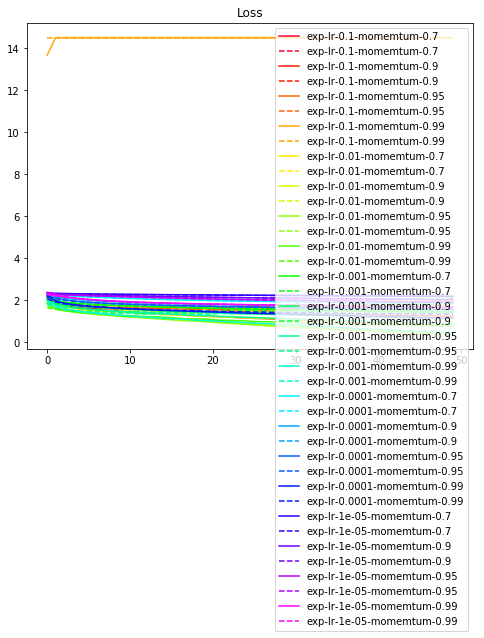

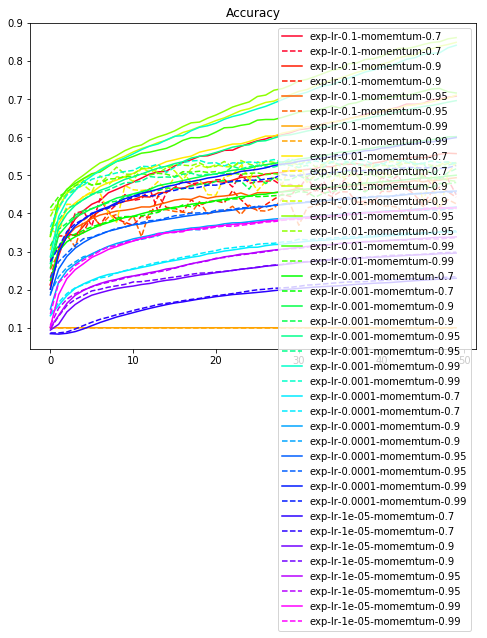

In [8]:
"""
Draw the results
"""

import matplotlib.pyplot as plt
%matplotlib inline

NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [12]:
len(results)

5